In [ ]:
import hashlib
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


class StudentDataset:
    def __init__(self,num_students:1000,username:"shriansh.sahu"):
        
        # Generate seed for random numbers generater
        seed = int(hashlib.sha256(username.encode()).hexdigest(), 16) % (2**32)
        self.rng = np.random.default_rng(seed)
        self.num_students = num_students
        self.username = username

        # Generate dataset once at initialization
        self.full_df = self.assemble_dataframe()
    

    def gender_generater(self) -> list[str]:

        # Generates random genders 

        return self.rng.choice(
            ["Male", "Female", "Other"],
            size=self.num_students,
            p=[0.65, 0.33, 0.02]
        )

    def generate_major(self) -> list[str]:

        # Generates Major for students

        return self.rng.choice(
            ["B.tech","MS","Phd"],
            size=self.num_students,
            p=[0.70,0.20,0.10]
        )

    def generate_program_with_major(self,majors : list [ str ]) -> list[str]:

        # Generate Program with major
        prog = []
        for major in majors:

            if major == "B.tech" :
                prog.append(self.rng.choice(["CSE","ECE","CHD","CND"],p=[0.40,0.40,0.10,0.10]))

            elif major == "MS" :
                prog.append(self.rng.choice(["CSE","ECE","CHD","CND"],p=[0.30,0.30,0.20,0.20]))

            else:
                prog.append(self.rng.choice(["CSE","ECE","CHD","CND"],p=[0.25,0.25,0.25,0.25]))
                
        return prog        

    def generate_gpa(self,majors : list [ str ]) -> list[str]:

        # Generate GPA with Major as parameter 

        gpa = []

        for major in majors:

            if major == "B.tech" :
                gpa.append(np.clip(self.rng.normal(7.0,1.0),4.0,10.0))

            elif major == "MS" :
                gpa.append(np.clip(self.rng.normal(8.0,0.7),4.0,10.0)) 

            else:
                gpa.append(np.clip(self.rng.normal(8.3,0.5),4.0,10.0))

        return gpa        

    def assemble_dataframe(self) -> pd.DataFrame:

        # Assemble all data into dataframe 

        majors = self.generate_major()
        df = pd.DataFrame({
            "Gender" : self.gender_generater(),
            "Major"  : majors,
            "Program": self.generate_program_with_major(majors),
            "GPA"    : self.generate_gpa(majors)
        })
        
        return df

    def get_full_dataframe(self) -> pd.DataFrame:

        return self.full_df    
    
    # Adding Username in the file name
    
    def _add_username(self):
        plt.text(
            0.95 , 0.95 , self.username,
            ha = 'right', va = 'top' ,
            transform = plt.gca().transAxes ,
            fontsize =10 , color = 'gray' , alpha =0.7
        )

        # Visualization For Following Distribution

    def plot_gender_distribution(self) -> None:
        sb.countplot(data=self.full_df , x = "Gender")
        plt.title("Gender Distibution")
        plt.xlabel("Gender")
        plt.ylabel("Count")
        self._add_username()
        plt.show   


    def plot_major_distribution(self) -> None:
        sb.countplot(data=self.full_df , x = "Major")
        plt.title("Major Distibution")
        plt.xlabel("Major")
        plt.ylabel("Count")
        self._add_username()
        plt.show      


    def plot_program_distribution(self) -> None:
        sb.countplot(data=self.full_df , x = "Program")
        plt.title("Program Distibution")
        plt.xlabel("Program")
        plt.ylabel("Count")
        self._add_username()
        plt.show     


    def plot_gpa_distribution(self , bins : int = 20) -> None:
        plt.hist(self.full_df["GPA"], bins=bins, edgecolor = "Yellow")
        plt.title("GPA Distibution")
        plt.xlabel("GPA")
        plt.ylabel("Frequency")
        self._add_username()
        plt.show     


    def plot_program_by_major(self) -> None:
        sb.countplot(data=self.full_df , x = "Major", hue = "Program")
        plt.title("Program Distibution by Major")
        plt.xlabel("Major")
        plt.ylabel("Count")
        plt.legend(title = "Program")
        self._add_username()
        plt.show  


    def plot_gpa_by_major(self) -> None:
        sb.boxplot(data=self.full_df , x = "Major", y = "GPA")
        plt.title("GPA Distibution by Major")
        plt.xlabel("Major")
        plt.ylabel("GPA")
        self._add_username()
        plt.show  


    def plot_gpa_by_program(self) -> None:
        sb.boxplot(data=self.full_df , x = "Program", y = "GPA")
        plt.title("GPA Distibution by Program")
        plt.xlabel("Program")
        plt.ylabel("GPA")
        self._add_username()
        plt.show     


    def plot_gpa_by_program_and_major(self) -> None:
        sb.boxplot(data = self.full_df , x = "Program", y = "GPA" , hue = "Major")
        plt.title("GPA Distibution by Program and Major")
        plt.xlabel("Program")
        plt.ylabel("GPA")
        plt.legend(title = "Major")
        self._add_username()
        plt.show  


    def plot_sampled_dataset(self) -> None:
        sampled = self.full_df.sample(100, random_state = self.rng)
        sb.pairplot(sampled , hue = "Gender")
        plt.suptitle("Sample Dataset of (1000 Students" ,y = 1.02)
        self._add_username()
        plt.show     


    def plot_entire_dataset_summary(self) -> None:
        sb.pairplot(self.full_df , hue = "Gender")
        plt.suptitle("Entire Dataset Summary" ,y = 1.02)
        self._add_username()
        plt.show    

    # b) Mean and SD of GPA

    def gpa_mean_std ( self ) -> tuple [ float , float ]:

        gpas = self.full_df["GPA"].to_numpy()
        mean = gpas.mean()
        sd = gpas.std()

        return [mean, sd]
    
    # c) Count No of stidnets for pair(program,major)

    def count_students_per_program_major_pair ( self ) -> pd.DataFrame:

        group_students = self.full_df.groupby(["Program","Major"]).size().reset_index(name = "Student_Count")

        return group_students
    
    # HeatMap For Student_Count

    def visualize_students_per_program_major_pair ( self , counts_df:pd.DataFrame) -> None :

        pivot_fulldf = counts_df.pivot( index="Major",columns="Program",values="Student_Count").fillna(0)
        sb.heatmap(pivot_fulldf,annot=True, fmt= ".0f" , cmap= "coolwarm" , cbar=True)
        plt.title(" NUmber of Students per Program and Major")
        plt.xlabel("Program")
        plt.ylabel("Major")
        self._add_username()
        plt.show()      


    # 1.2 Simple and Stratified sampling 


      #    By Simple Sampling

    def get_gpa_mean_std_random ( self , Samplesize : int = 500 , repeats : int = 50)-> tuple [ float , float ]:

       gpa_means = []
       gpa_stds  = []
       for i in range(repeats):
            sampled = self.full_df.sample(500)
            means = sampled["GPA"].mean()
            stds = sampled["GPA"].std()

            gpa_means.append(means) 
            gpa_stds.append(stds)

       gpa_mean_avg = sum(gpa_means)/len(gpa_means)
       std_mean_gpa = (pd.Series(gpa_means).std())


       return (gpa_mean_avg , std_mean_gpa)
    

    # By Stratified Sampling
    
    def get_gpa_mean_std_stratified ( self , n : int = 500 , repeats : int = 50) -> tuple [ float , float ]:

        gpa_means = []
        for i in range(repeats):
            sampled = self.full_df.groupby("Major").sample(n = int(n/len(self.full_df['Major'].unique())), replace= True)

            gpa_sum = sampled["GPA"].mean()
            gpa_means.append(gpa_sum) 
    
            
        gpa_mean_avg = sum(gpa_means)/len(gpa_means)
        std_mean_gpa = (pd.Series(gpa_means).std())


        return (gpa_mean_avg , std_mean_gpa)



# Q1.0 Dataset Generation

In [9]:
dataset = StudentDataset(1000,"shriansh.sahu")
print(dataset.get_full_dataframe())

     Gender   Major Program       GPA
0      Male  B.tech     ECE  6.128834
1     Other  B.tech     CSE  6.988293
2    Female  B.tech     CSE  7.675095
3      Male     Phd     CSE  7.709525
4    Female  B.tech     CHD  8.663156
..      ...     ...     ...       ...
995  Female      MS     CSE  8.482928
996  Female  B.tech     CSE  6.530712
997    Male  B.tech     CSE  6.571792
998    Male  B.tech     ECE  6.682845
999    Male  B.tech     CHD  8.975075

[1000 rows x 4 columns]


# Q1.1 Dataset Analysis

## a.Visualization Methods

### 1. Geneder Distribution

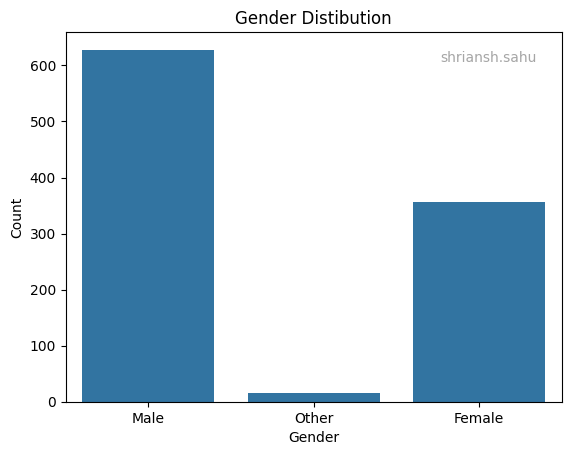

In [15]:
dataset = StudentDataset(1000,"shriansh.sahu")
dataset.plot_gender_distribution()

### 2. Major Distribution

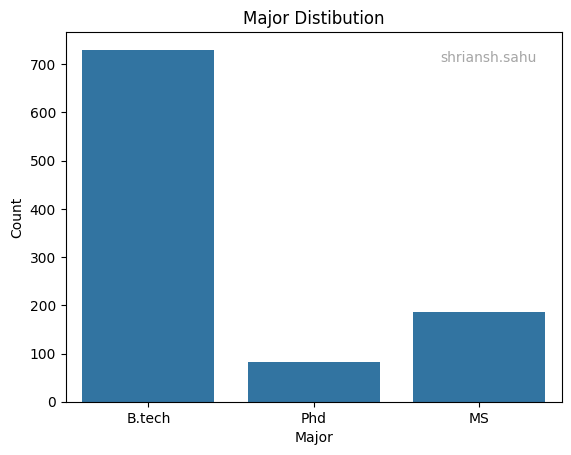

In [16]:
dataset = StudentDataset(1000,"shriansh.sahu")

dataset.plot_major_distribution()

### 3. Program Distribution

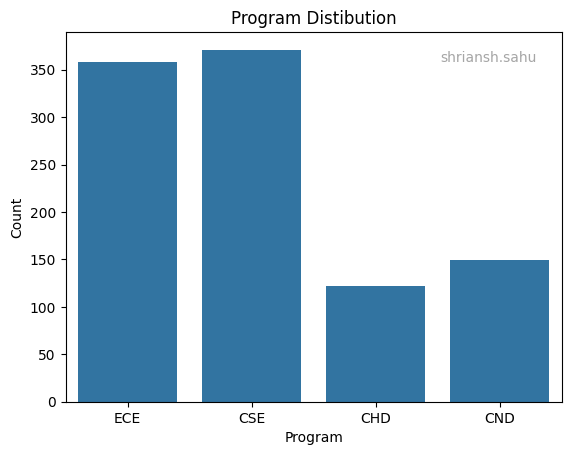

In [18]:
dataset = StudentDataset(1000,"shriansh.sahu")
dataset.plot_program_distribution()

### 4. GPA Distribution 

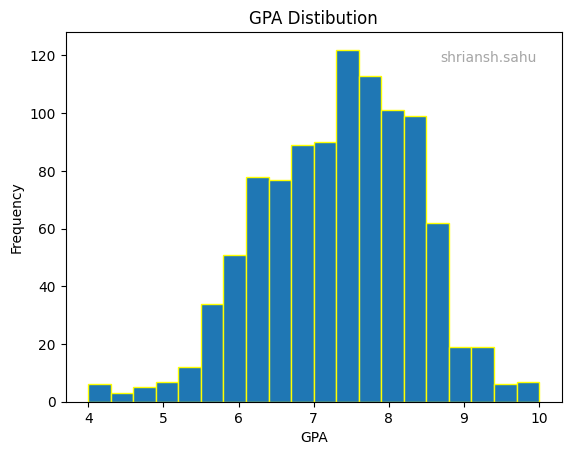

In [17]:
dataset = StudentDataset(1000,"shriansh.sahu")

dataset.plot_gpa_distribution()

### 5. Program Distribution By Major

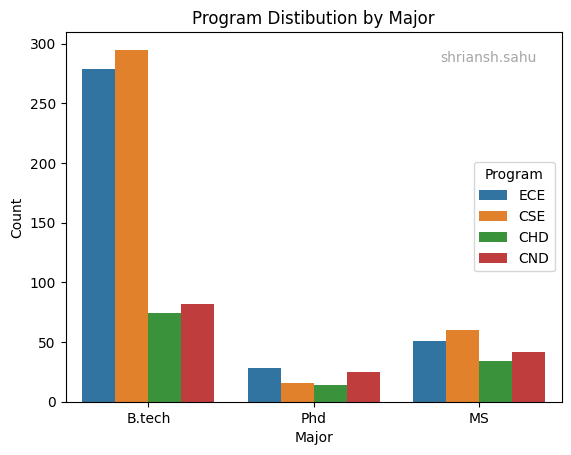

In [19]:
dataset = StudentDataset(1000,"shriansh.sahu")

dataset.plot_program_by_major()

### 6. GPA Distribution By Major

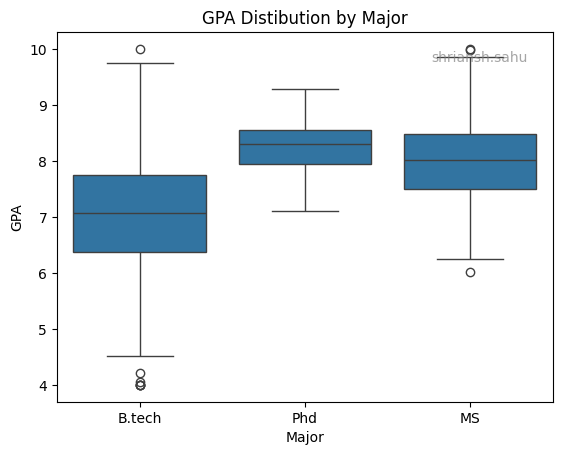

In [20]:
dataset = StudentDataset(1000,"shriansh.sahu")

dataset.plot_gpa_by_major()

### 7. GPA Distribution By Program

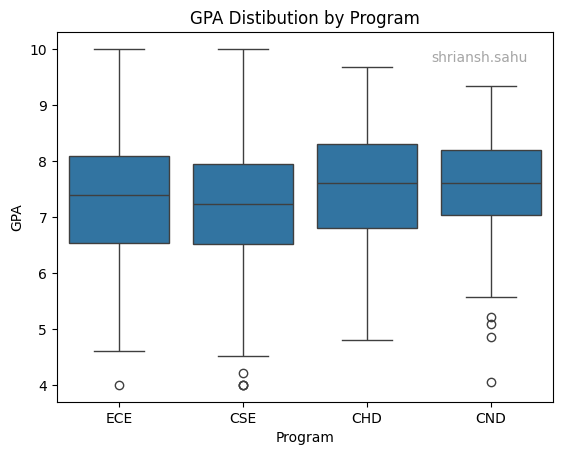

In [21]:
dataset = StudentDataset(1000,"shriansh.sahu")

dataset.plot_gpa_by_program()

### 8. GPA Distribution By Program And Major

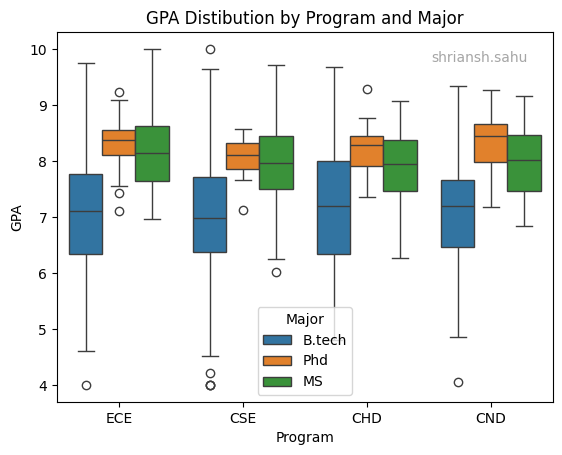

In [22]:
dataset = StudentDataset(1000,"shriansh.sahu")

dataset.plot_gpa_by_program_and_major()

### 9. Sampled Dataset

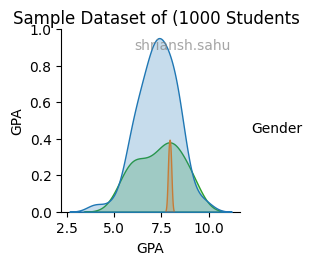

In [23]:
dataset = StudentDataset(1000,"shriansh.sahu")

dataset.plot_sampled_dataset()

### 10. Entire Dataset Summary

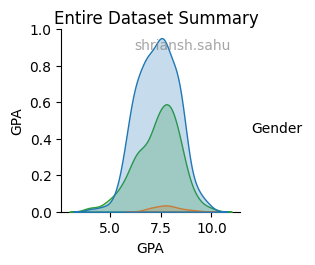

In [24]:
dataset = StudentDataset(1000,"shriansh.sahu")

dataset.plot_entire_dataset_summary()

# b. GPA Summary Statistics

In [3]:
dataset = StudentDataset(1000,"shriansh.sahu")
dataset.gpa_mean_std()

[np.float64(7.334668806749247), np.float64(1.0216215603911476)]

# c. Program Major Combination

### Student Counts 

In [4]:
dataset = StudentDataset(1000,"shriansh.sahu")
dataset.count_students_per_program_major_pair()

,Program,Major,Student_Count
0,CHD,B.tech,74
1,CHD,MS,34
2,CHD,Phd,14
3,CND,B.tech,82
4,CND,MS,42
5,CND,Phd,25
6,CSE,B.tech,295
7,CSE,MS,60
8,CSE,Phd,16
9,ECE,B.tech,279


### Student_Count HeatMap

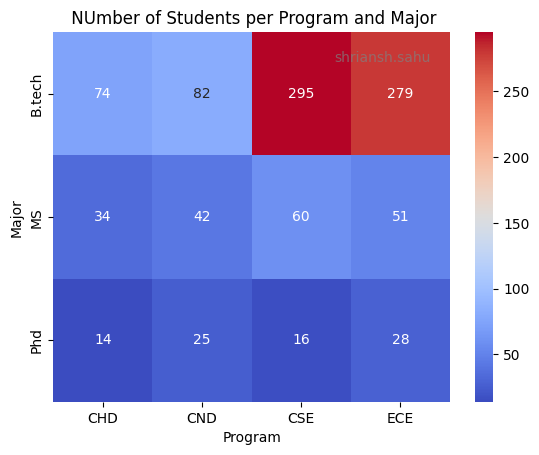

In [5]:
dataset = StudentDataset(1000,"shriansh.sahu")
counts_df = dataset.count_students_per_program_major_pair()
dataset.visualize_students_per_program_major_pair(counts_df)

# Q1.2 Simple vs Stratified Sampling

### Simple Sampling

In [68]:
dataset = StudentDataset(1000,"shriansh.sahu")
dataset.get_gpa_mean_std_random()

(np.float64(7.331928186114917), np.float64(0.03141391100685392))

### Stratified Sampling

In [75]:
dataset = StudentDataset(1000,"shriansh.sahu")
dataset.get_gpa_mean_std_stratified()

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50


(np.float64(7.774018965787729), np.float64(0.03983173730085439))